In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# introduction

In [9]:
df = pd.read_csv('Proyecto Final - Python Visualización de Data con Matplotlib/Crehana - Netflix Dataset.csv',index_col=['Unnamed: 0'])

In [59]:
df.head()

,titulo,año,tipo,genero,rating,votos,pais,idioma,duracion_minutos,director
0,Dinosaur Planet,2003,mini series,Documentary,77,474.0,United States,English,50.0,NaN
1,Character,2021,movie,Crime,83,46.0,Japan,Japanese,125.0,Akira Nagai
2,Get Up and Dance!,1994,movie,Family,81,18.0,United States,English,54.0,Steve Purcell
3,The Rise and Fall of El Chapo,2016,movie,Documentary,69,42.0,United States,English,85.0,NaN
4,8 Man,1992,movie,Action,55,93.0,Japan,Japanese,83.0,Yasuhiro Horiuchi


In [13]:
df.shape

(6546, 10)

In [57]:
top_votos = df.sort_values(by='votos',ascending=False).head(10)

,titulo,año,tipo,genero,rating,votos,pais,idioma,duracion_minutos,director
838,Berlin: Symphony of a Great City,1927,movie,Documentary,76,4204.0,Germany,None,65.0,Walter Ruttmann
969,Napoleon,1927,movie,Documentary,82,7567.0,France,French,330.0,Abel Gance
3541,Metropolis,1927,movie,Drama,83,166632.0,Germany,None,153.0,Fritz Lang
6309,Napoleon,1927,movie,Documentary,82,7567.0,France,French,NaN,Abel Gance
6677,Metropolis,1927,movie,Drama,83,166632.0,Germany,None,NaN,Fritz Lang


In [75]:
titulo_by_year = df.groupby('año')[['titulo']].count().reset_index()

# Cambiar estilo

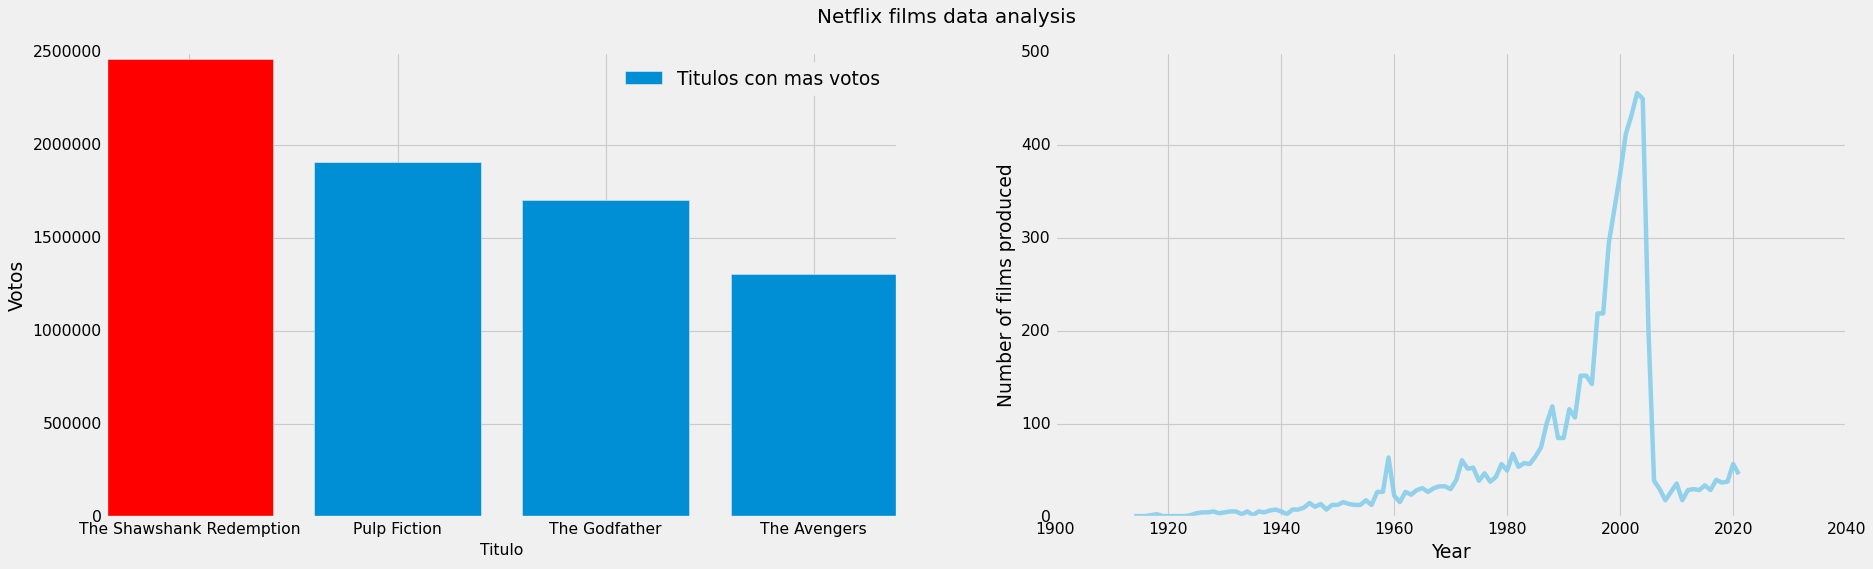

In [245]:
plt.style.use('fivethirtyeight')
fig , ax = plt.subplots(1,2,figsize=(25,7))
ax[0].bar(top_votos['titulo'],top_votos['votos'],label='Titulos con mas votos')
ax[0].patches[1].set_facecolor('red')
ax[0].set_xlabel('',fontsize=14)
ax[0].legend()

ax[1].plot(titulo_by_year['año'],titulo_by_year['titulo'],c='skyblue',alpha=0.9)

ax[0].set_xlabel('Titulo')
ax[0].set_ylabel('Votos')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of films produced')
fig.suptitle('Netflix films data analysis', fontsize=18)


plt.show()

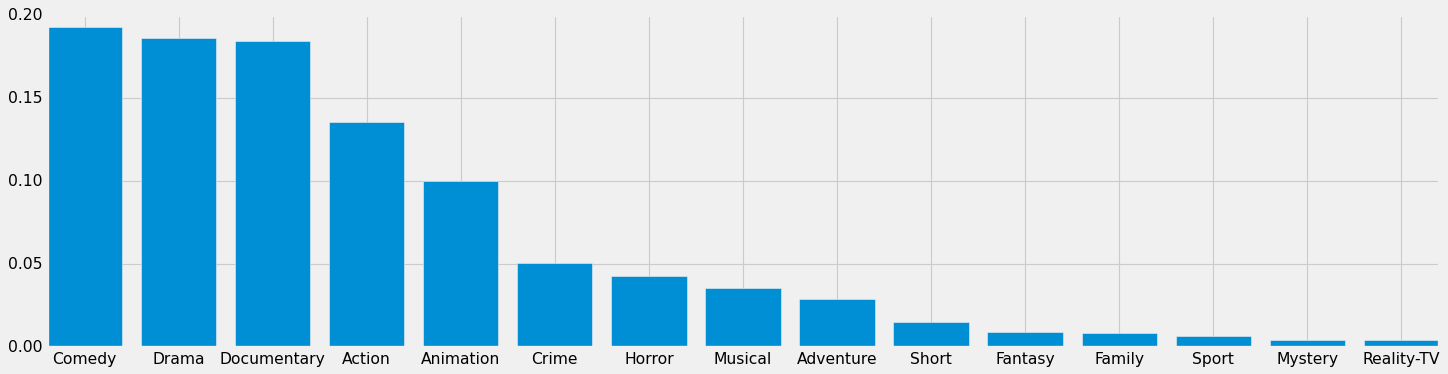

In [151]:
plt.figure(figsize=(20,5))
plt.bar(df['genero'].value_counts().index,df['genero'].value_counts(normalize=True).values)

plt.show()

In [170]:
df.año.value_counts().sort_values().index

Int64Index([1916, 1914, 1923, 1919, 1935, 1924, 1918, 1941, 1933, 1929,
            ...
            2005, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2004, 2003],
           dtype='int64', length=103)

In [207]:
df_action = df[df['genero'] == 'Action']

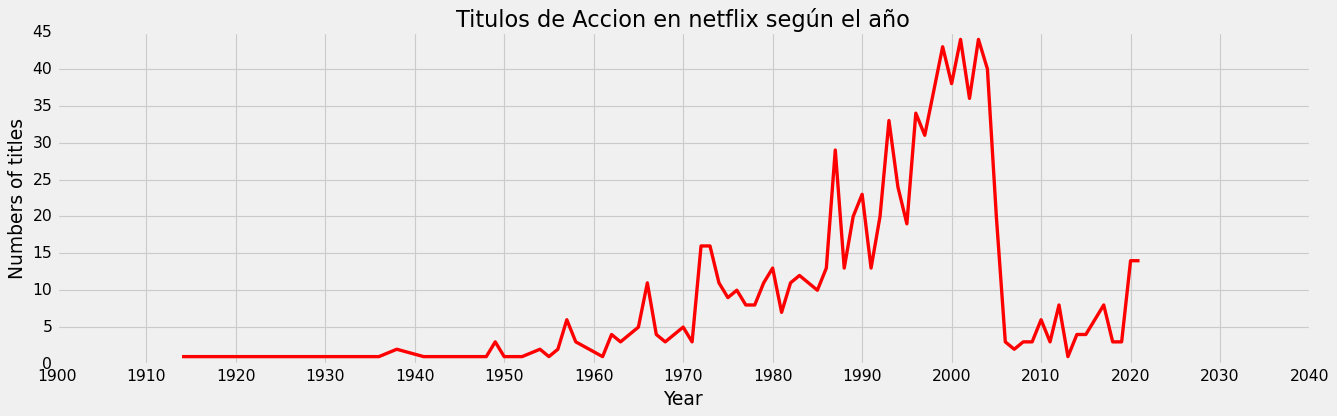

In [216]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,5))
plt.plot(df_action.año.value_counts().sort_index(ascending=False).index,df_action.año.value_counts().sort_index(ascending=False).values,c='red',linewidth=3,)
plt.title('Titulos de Accion en netflix según el año')
plt.xlabel('Year')
plt.ylabel('Numbers of titles')
plt.xticks(range(1900,2041,10))
plt.show()

# Calcular el error en un grafico de barras

In [233]:
mean_rating_by_genero = df.rating.groupby(df['genero']).mean()
x_bar = mean_rating_by_genero.sort_values(ascending=False).index
y_bar = mean_rating_by_genero.sort_values(ascending=False)

In [229]:
error_in_mean_rating = df.rating.groupby(df['genero']).std()

Concateno para que el error este anclado a la variable correcta

In [236]:
error = pd.concat([y_bar,error_in_mean_rating],keys=['y_bar','error'],axis='columns')

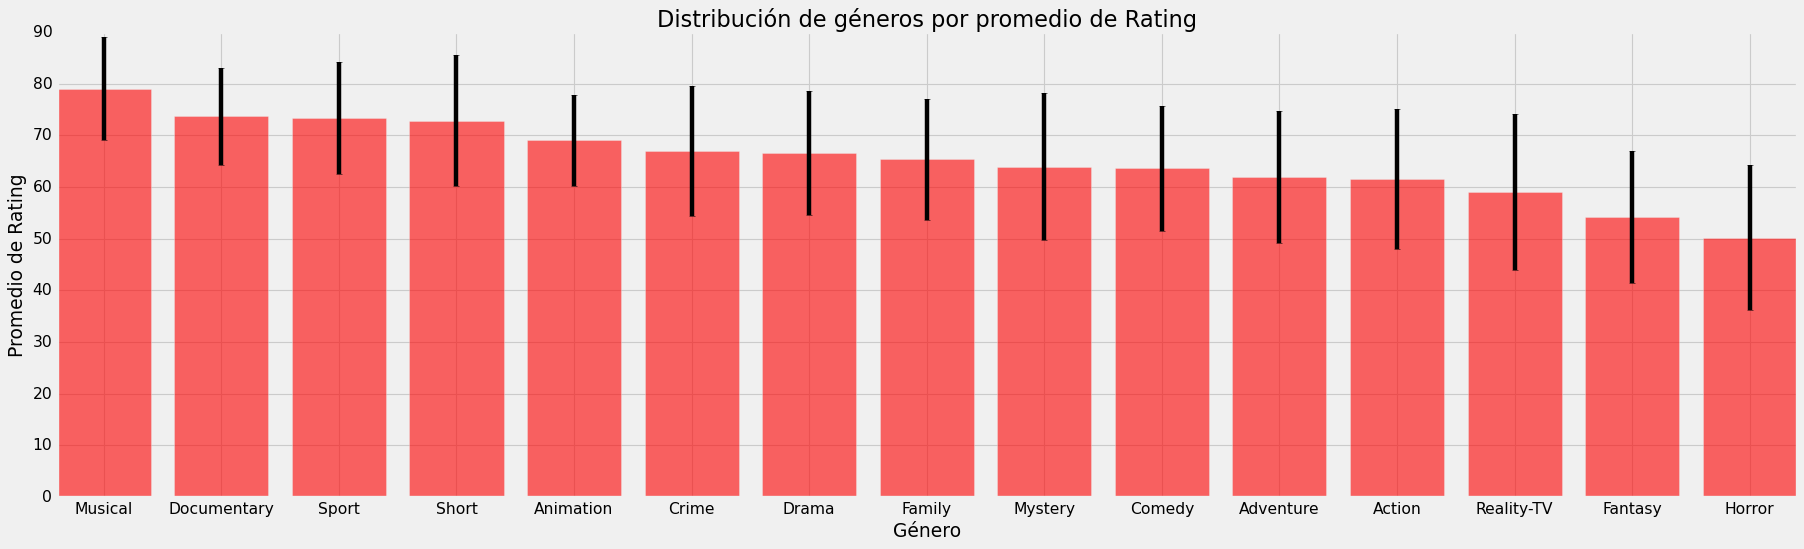

In [243]:
fig, ax = plt.subplots()
fig.set_size_inches(25,7)
ax.bar(x_bar,y_bar,yerr=error['error'],color='red',alpha=0.6)
ax.set_title('Distribución de géneros por promedio de Rating')
ax.set_xlabel('Género')
ax.set_ylabel('Promedio de Rating')

plt.show()

# Histogramas

In [264]:
df.genero.value_counts()

Comedy         1260
Drama          1215
Documentary    1205
Action          886
Animation       653
Crime           328
Horror          278
Musical         229
Adventure       187
Short            98
Fantasy          59
Family           55
Sport            42
Mystery          27
Reality-TV       24
Name: genero, dtype: int64

In [265]:
df.query('genero == "Action"')

,titulo,año,tipo,genero,rating,votos,pais,idioma,duracion_minutos,director
4,8 Man,1992,movie,Action,55,93.0,Japan,Japanese,83.0,Yasuhiro Horiuchi
9,By Dawn's Early Light,1990,movie,Action,71,2898.0,United States,English,100.0,Jack Sholder
15,Zatoichi's Conspiracy,1973,movie,Action,71,911.0,Japan,Japanese,88.0,Kimiyoshi Yasuda
24,DragonHeart,1996,movie,Action,65,94804.0,United States,English,103.0,Rob Cohen
30,"At Home Among Strangers, a Stranger Among His Own",1974,movie,Action,75,2968.0,Soviet Union,Russian,97.0,Nikita Mikhalkov
...,...,...,...,...,...,...,...,...,...,...
6910,WWE SummerSlam,2021,movie,Action,64,208.0,United States,English,NaN,NaN
6916,Redemption Day,2021,movie,Action,61,22681.0,United States,English,NaN,Hicham Hajji
6920,Icebreaker,2000,movie,Action,36,1146.0,United States,English,NaN,David Giancola
6923,Open City,2008,movie,Action,63,767.0,South Korea,Korean,NaN,Sang-gi Lee


In [280]:
number_bins = int(np.round(np.sqrt(df.query('genero == "Action" & año >= 2010').rating.shape[0]),0))
number_bins

9

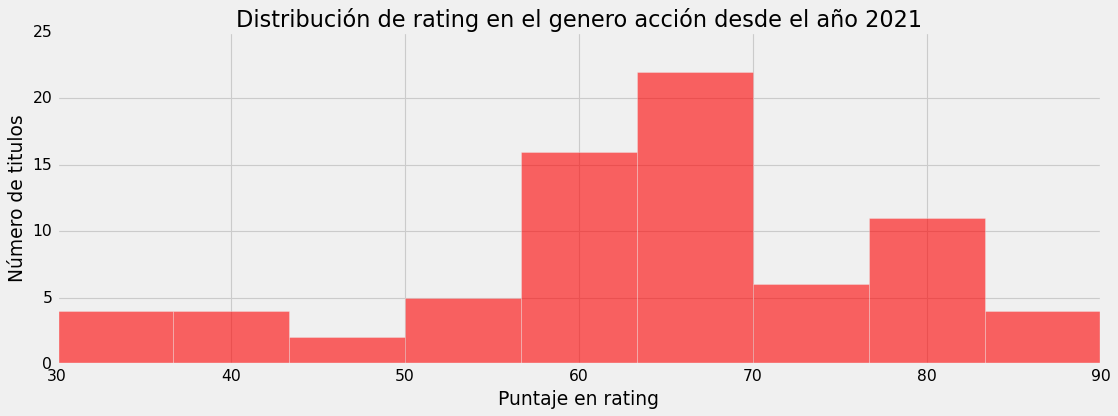

In [281]:
plt.figure(figsize=(15,5))
plt.hist(df.query('genero == "Action" & año >= 2010').rating,color='red',alpha=.6,bins=number_bins)
plt.title('Distribución de rating en el genero acción desde el año 2021')
plt.ylabel("Número de titulos")
plt.xlabel("Puntaje en rating")
plt.show()

# Box plot

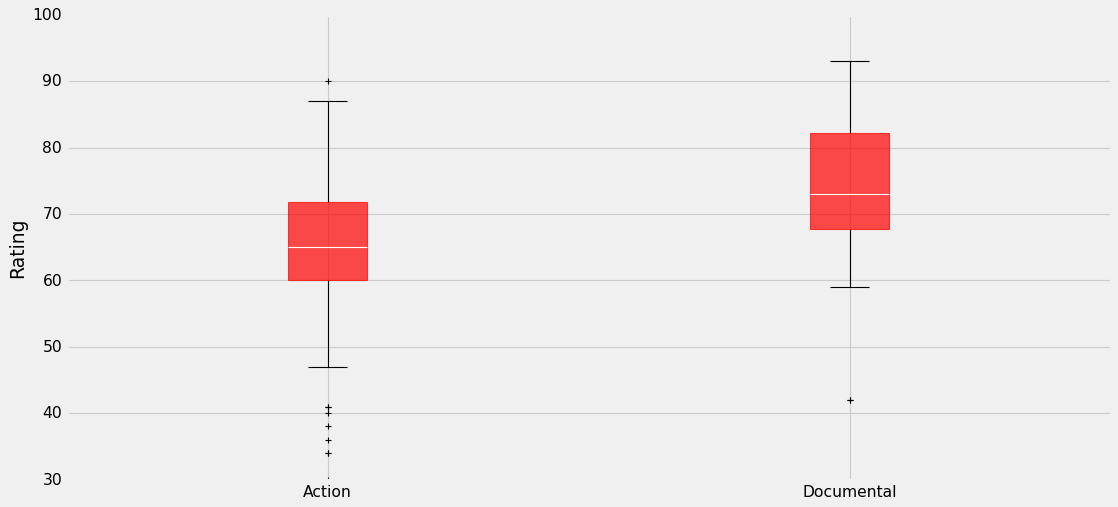

In [331]:
plt.figure(figsize=(15,7))
rating_action = df.query('genero == "Action" & año >= 2010').rating
rating_documental = df.query('genero == "Documentary" & año >= 2010').rating
plt.boxplot([rating_action,rating_documental],patch_artist=True,whiskerprops=dict(linestyle='-',color='black',linewidth=1),boxprops=dict(facecolor='red',color='red',alpha=0.7),medianprops=dict(color='white'))
plt.xticks(np.arange(1,3),['Action','Documental'])
plt.ylabel('Rating')
plt.show()

# Automatizar graficos

In [335]:
x_labels = df['genero'].unique()

In [350]:
df.año.unique().max()

2021

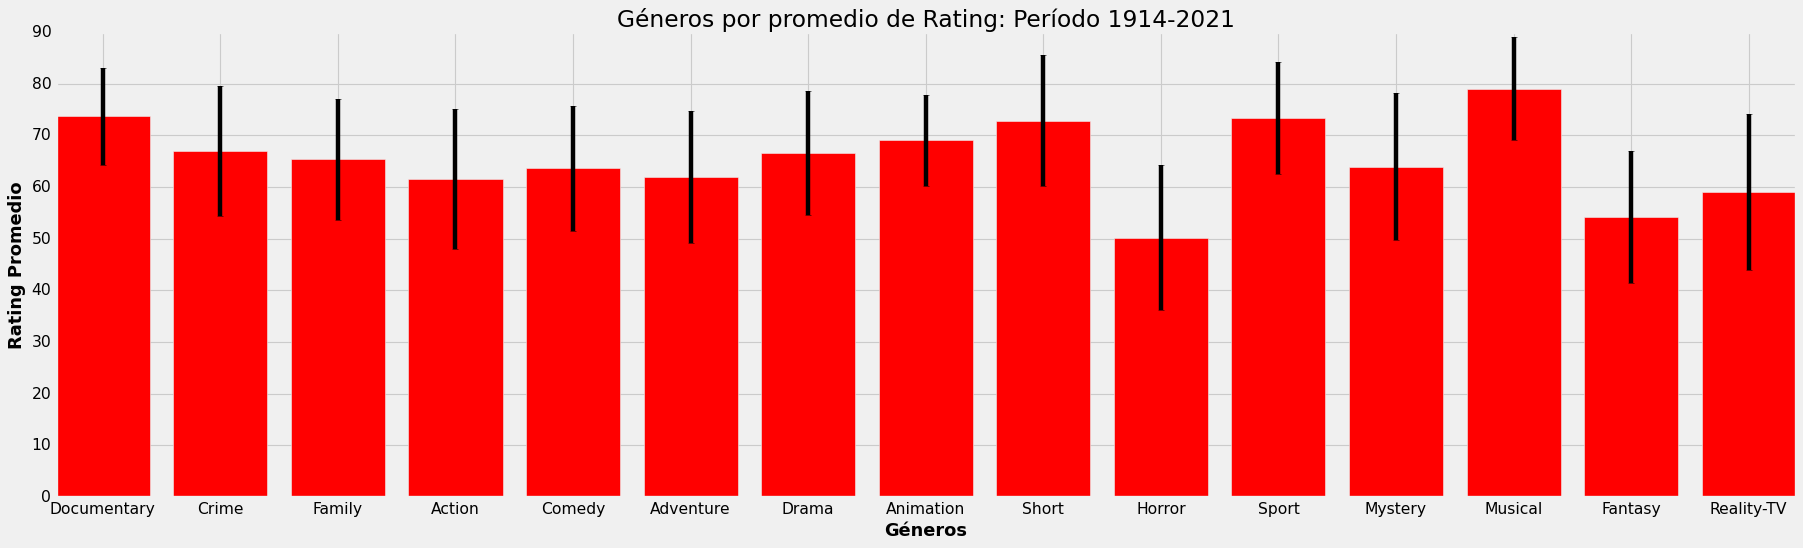

In [366]:
fig, ax = plt.subplots()
fig.set_size_inches(25,7)

for gen in x_labels:
    ax.bar(gen,df[df['genero']==gen].rating.mean(),yerr=df[df['genero']==gen].rating.std(),color='red')

ax.set_xlabel('Géneros',fontsize=16,fontweight='bold')
ax.set_ylabel('Rating Promedio',fontsize=16,fontweight='bold')
ax.set_title('Géneros por promedio de Rating: Período 1914-2021',fontsize=21)

plt.show()

# Guardar graficos

In [367]:
fig.savefig('Géneros por promedio de Rating: Período 1914-2021.jpeg',dpi=300)